In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dill

import sys
sys.path.append('/Users/abeane/scratch/actions_systematic/runs')
sys.path.append('/Users/abeane/scratch/actions_systematic/runs/include')

In [2]:
fiducial = dill.load(open('cluster_snapshots_m12i_actions.p', 'rb'))
slow = dill.load(open('cluster_snapshots_m12i_slow_actions.p', 'rb'))
fast = dill.load(open('cluster_snapshots_m12i_fast_actions.p', 'rb'))

In [3]:
time = np.array([f['time'] for f in fiducial])
actions_one_star = np.array([f['actions'][2] for f in fiducial])

In [16]:
def make_fig(snap, title):
    fig, ax = plt.subplots(1,3, figsize=(10, 3))
    alpha=0.005
    for i in range(len(snap[0]['actions'])):
        actions_one_star = np.array([f['actions'][i] for f in snap])
        ax[0].plot(time, actions_one_star[:,0], alpha=alpha)
        ax[1].plot(time, actions_one_star[:,1], alpha=alpha)    
        ax[2].plot(time, actions_one_star[:,2], alpha=alpha)
    ax[1].set_title(title)
    for x in ax:
        x.set_xlabel('time [Myr]')
    ax[0].set_ylabel('Jr [ kpc km/s ]')
    ax[1].set_ylabel('Jz [ kpc km/s ]')
    ax[2].set_ylabel('Lz [ kpc km/s ]')
    fig.tight_layout()

In [12]:
def plot_orbit(snap, title):
    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    pos = np.array([np.median(s['position'], axis=0) for s in snap])
    R = np.linalg.norm(pos[:,:2], axis=1)
    z = pos[:,2]
    ax[0].plot(time, R)
    ax[1].plot(time, z)
    ax[2].plot(R, z)
    ax[0].set_xlabel('time [Myr]')
    ax[1].set_xlabel('time [Myr]')
    ax[2].set_xlabel('r [kpc]')
    ax[0].set_ylabel('r [kpc]')
    ax[1].set_ylabel('z [kpc]')
    ax[2].set_ylabel('z [kpc]')
    ax[1].set_title(title)
    fig.tight_layout()
        

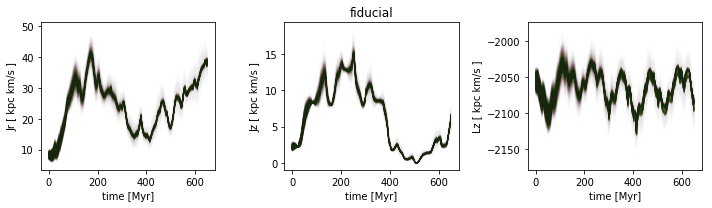

In [17]:
make_fig(fiducial, 'fiducial')

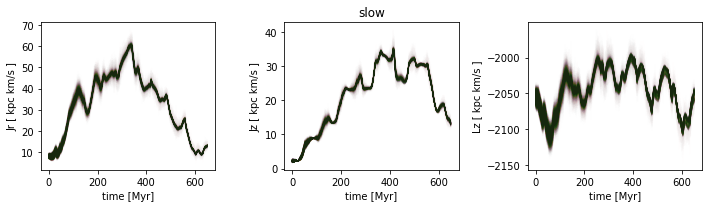

In [18]:
make_fig(slow, 'slow')

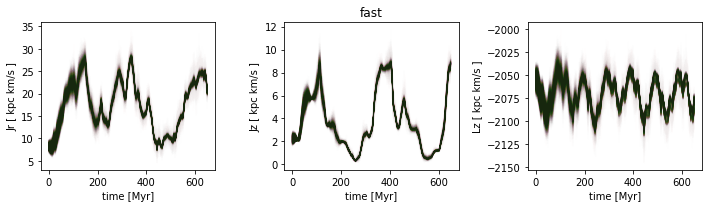

In [19]:
make_fig(fast, 'fast')

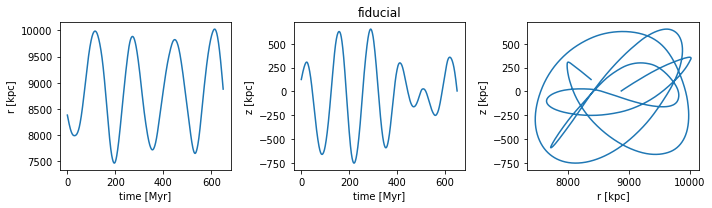

In [13]:
plot_orbit(fiducial, 'fiducial')

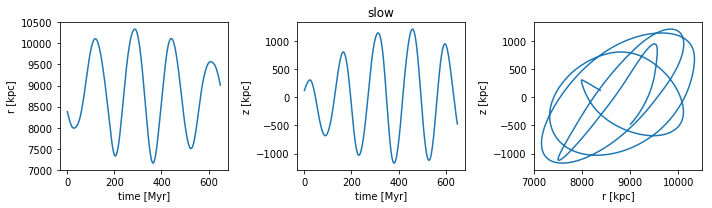

In [14]:
plot_orbit(slow, 'slow')

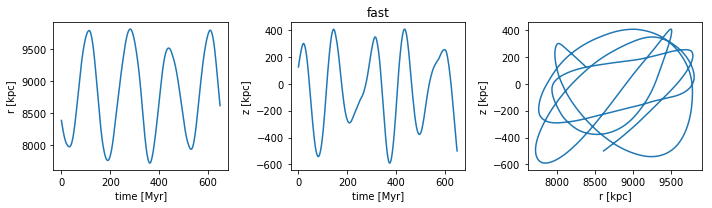

In [15]:
plot_orbit(fast, 'fast')

# Now let's optimize

In [10]:
from scipy.optimize import minimize

In [11]:
def euler_matrix(theta) :
    R_x = np.array([[1,         0,                  0                   ],
                    [0,         np.cos(theta[0]), -np.sin(theta[0]) ],
                    [0,         np.sin(theta[0]), np.cos(theta[0])  ]
                    ])
    R_y = np.array([[np.cos(theta[1]),    0,      np.sin(theta[1])  ],
                    [0,                     1,      0                   ],
                    [-np.sin(theta[1]),   0,      np.cos(theta[1])  ]
                    ])
    R_z = np.array([[np.cos(theta[2]),    -np.sin(theta[2]),    0],
                    [np.sin(theta[2]),    np.cos(theta[2]),     0],
                    [0,                     0,                      1]
                    ])
    R = np.dot(R_z, np.dot( R_y, R_x ))
    return R

In [ ]:
def chisq(x):
    